In [36]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Classification with Keras

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

# train, validation and test split
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

# Normalizing the data 
print (X_train.shape)
print (X_train.dtype)

X_train, X_valid, X_test = X_train / 255, X_valid / 255, X_test / 255

(55000, 28, 28)
uint8


In [3]:
# Each index in y represents one of these classes
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",  "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print (class_names[y_train[0]])
print (class_names[y_train[1]])


Ankle boot
T-shirt/top


In [4]:
tf.random.set_seed(42)

# One way to define a NN
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Input(shape=[28,28]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(300, activation="relu"))
# model.add(tf.keras.layers.Dense(100, activation="relu"))
# model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Another way to define the same NN (notice no Input layer)
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=[28, 28]),
        tf.keras.layers.Dense(300, activation="relu"),
        tf.keras.layers.Dense(100, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


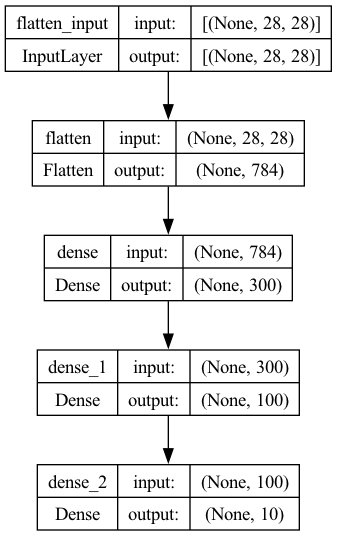

In [6]:
# Another way to get a sense of the NN 
tf.keras.utils.plot_model(model, show_shapes=True)

In [21]:
# Working with the model's layers directly (will be used later for more advanced use cases)
print ("Layers: ", model.layers)

dense_1 = model.get_layer("dense")
weights_1, biases_1 = dense_1.get_weights()
print (weights_1.shape, biases_1.shape)

Layers:  [<keras.src.layers.reshaping.flatten.Flatten object at 0x28b383650>, <keras.src.layers.core.dense.Dense object at 0x288e76350>, <keras.src.layers.core.dense.Dense object at 0x288dbef90>, <keras.src.layers.core.dense.Dense object at 0x28ae942d0>]
(784, 300) (300,)


In [43]:
# Compiling and fitting the model

model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))


Epoch 1/30
1719/1719 [==============================] - 2s 833us/step - loss: 0.1334 - accuracy: 0.9532 - val_loss: 0.3310 - val_accuracy: 0.8880
Epoch 2/30
1719/1719 [==============================] - 1s 741us/step - loss: 0.1318 - accuracy: 0.9535 - val_loss: 0.3308 - val_accuracy: 0.8920
Epoch 3/30
1719/1719 [==============================] - 1s 746us/step - loss: 0.1284 - accuracy: 0.9555 - val_loss: 0.3305 - val_accuracy: 0.8908
Epoch 4/30
1719/1719 [==============================] - 1s 766us/step - loss: 0.1280 - accuracy: 0.9558 - val_loss: 0.3334 - val_accuracy: 0.8928
Epoch 5/30
1719/1719 [==============================] - 1s 819us/step - loss: 0.1254 - accuracy: 0.9558 - val_loss: 0.3319 - val_accuracy: 0.8910
Epoch 6/30
1719/1719 [==============================] - 1s 756us/step - loss: 0.1231 - accuracy: 0.9568 - val_loss: 0.3620 - val_accuracy: 0.8890
Epoch 7/30
1719/1719 [==============================] - 1s 805us/step - loss: 0.1216 - accuracy: 0.9578 - val_loss: 0.3464 -

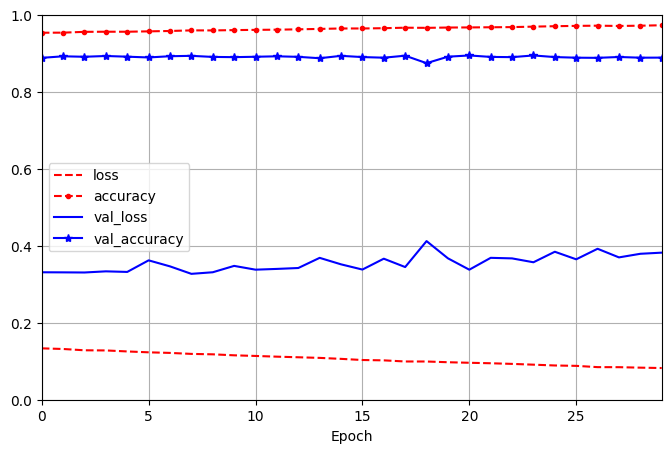

In [44]:
# history.history contains (per epoch): loss, val loss, extra metrics (train, val).
# Since we use a validation set and have an extra accuracy metric, we have 4 metrics to plot:
# train loss, val loss, train accuracy, val accuracy.
pd.DataFrame(history.history).plot(
  figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch", 
  style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [35]:
# Unbalanced dataset handling using class_weights

from sklearn.utils import compute_class_weight

# unbalanced set
y_example = [0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2]

class_weights = compute_class_weight('balanced', classes=np.unique(y_example), y=y_example)
class_weights_dict = {i:weight for i,weight in enumerate(class_weights)}


{0: 3.3333333333333335, 1: 0.5128205128205128, 2: 1.3333333333333333}

In [45]:
# Evaluating the model on the test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 546us/step - loss: 0.4082 - accuracy: 0.8857


[0.4081856906414032, 0.885699987411499]

In [54]:
# Making predictions

predict_num = 10
y_proba = model.predict(X_test[:predict_num])
print (y_proba.round(3))

actuals = y_test[:predict_num]
predicted = np.argmax(y_proba, axis=1)

print ("Actuals: ", [class_names[i] for i in actuals])
print ("Predicted: ", [class_names[i] for i in predicted])


1/1 [==============================] - 0s 10ms/step
[[0.    0.    0.    0.    0.    0.    0.    0.    0.    1.   ]
 [0.    0.    0.997 0.    0.003 0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.476 0.    0.    0.    0.001 0.    0.523 0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    1.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    0.    0.    1.    0.    0.   ]]
Actuals:  ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']
Predicted:  ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt', 'Trouser', 'Coat', 'Shirt', 'Sandal', 'Sneaker']


# Regression with Keras

In [ ]:
# Instead of using the StandardScaler to scale the California housing dataset, we'll use Keras Normalization layer
# which does the same thing